In [81]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [82]:
# MNIST 숫자 손글씨 Dataset 불러들이기

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.12.0
60000


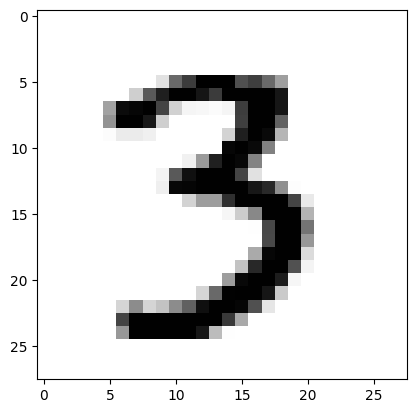

10001 번째 이미지의 숫자는 바로  3 입니다.


In [83]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [84]:
# 데이터 전처리 하기

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [85]:



# 가위,바위,보 이미지를 resize 하자.
# 사이저는 28 x 28로 하자

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [86]:
pwd

'/content'

In [87]:
# 딥러닝 네트워크 설계하기

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (

In [111]:
# 딥러닝 네트워크 학습시키기

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (3300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (9900, 28, 28, 1)
After Reshape - x_test_reshaped shape: (900, 28, 28, 1)


In [113]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)



ValueError: ignored

In [90]:
# 모델 평가하기
# 테스트 데이터로 성능을 확인해보기
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0408 - accuracy: 0.9875 - 1s/epoch - 3ms/step
test_loss: 0.0408114492893219 
test_accuracy: 0.987500011920929


313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [2.1141577e-07 8.9490132e-10 1.5673733e-07 1.3903451e-05 1.6177569e-10
 5.4961557e-08 2.8396106e-13 9.9998569e-01 3.8315415e-10 7.8034921e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


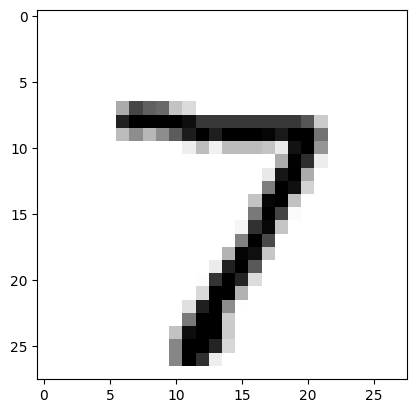

In [91]:
# 어떤 데이터를 잘못 추론했는지 확인해보기

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0  # 1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 실제 데이터 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.3845011e-08 9.4528465e-09 1.5741348e-07 1.3480558e-01 3.6978662e-08
 2.7519140e-02 8.7273602e-09 1.1000561e-08 4.4053337e-01 3.9714170e-01]
라벨: 9, 예측결과: 8


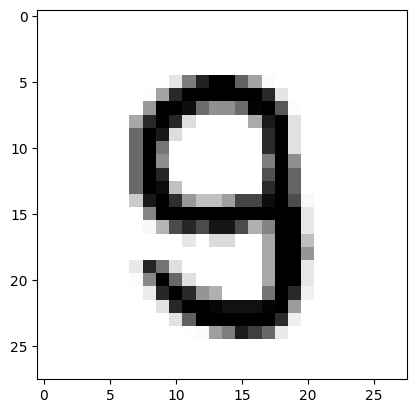

예측확률분포: [5.6116946e-02 1.1468491e-03 1.5791714e-02 9.0375113e-01 6.4303278e-04
 1.9877688e-03 2.6488437e-05 1.1448632e-02 3.6172024e-03 5.4701539e-03]
라벨: 9, 예측결과: 3


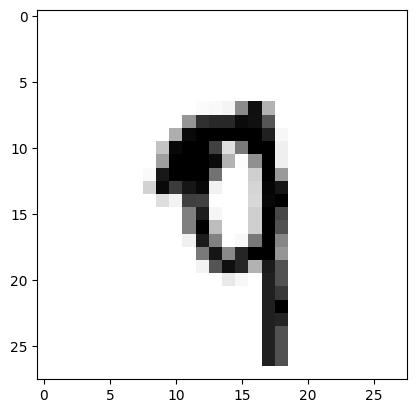

예측확률분포: [5.6116946e-02 1.1468491e-03 1.5791714e-02 9.0375113e-01 6.4303278e-04
 1.9877688e-03 2.6488437e-05 1.1448632e-02 3.6172024e-03 5.4701539e-03]
라벨: 9, 예측결과: 3


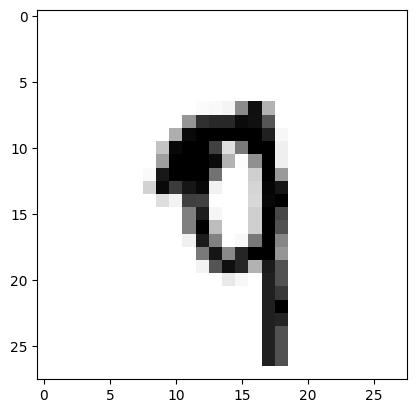

예측확률분포: [7.1569026e-14 2.4600092e-12 6.1008962e-11 2.7745122e-01 3.5464934e-14
 7.2254747e-01 4.4598128e-13 1.0595132e-12 1.3287336e-06 3.1121466e-12]
라벨: 3, 예측결과: 5


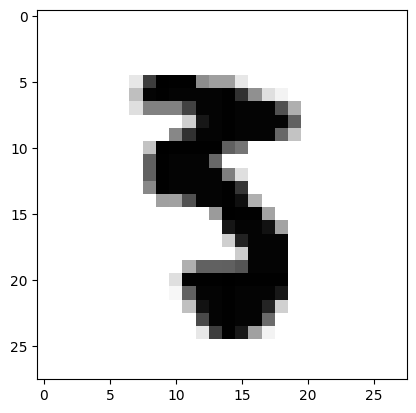

예측확률분포: [1.0378447e-11 5.7986533e-08 7.5095421e-08 4.3523116e-08 8.3126370e-12
 1.0767388e-01 3.1726971e-02 2.8702755e-14 8.6059868e-01 3.2446960e-07]
라벨: 6, 예측결과: 8


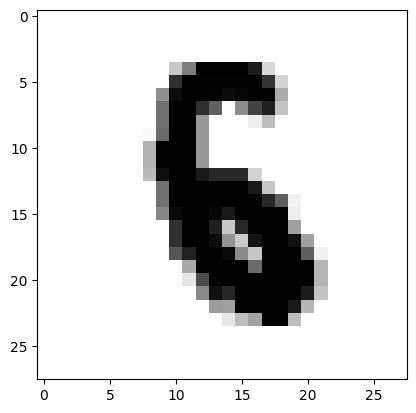

In [92]:
# 추론해낸 숫자와 실제 값이 다른 경우를 확인해보는 코드이다.

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [93]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

# 이미지 Resize 하기
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors"

print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PIL 라이브러리 import 완료!
이미지 디렉토리 경로:  /content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors
가위 이미지 resize 완료!


In [95]:
# load_data 함수

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 402 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


In [104]:
# train 데이터 리사이즈.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors"

resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("path:"+image_dir_path)



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/rock"
resize_images(image_dir_path)
# (x_train, y_train) = load_data(image_dir_path)

print("바위 이미지 resize 완료!")
print("path:"+image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
print("path:"+image_dir_path)

201  images to be resized.
201  images resized.
가위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors
201  images to be resized.
201  images resized.
바위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/rock
201  images to be resized.
201  images resized.
보 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/paper


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

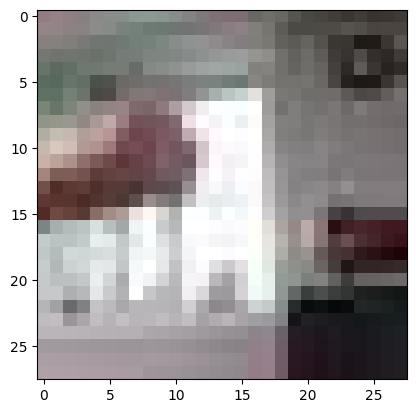

51 번째 이미지는 바로  1 입니다.


In [105]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
# n_train_epoch=5
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


index=50     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

In [99]:
# # 가위 : 0, 바위 : 1, 보 : 2 
# 위에서 바위 (1)에 대한 것은 일치.

In [114]:
# train에 대한 학습

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)





Epoch 1/10
104/104 [==============================] - 2s 4ms/step - loss: 0.0422 - accuracy: 0.9918
Epoch 2/10
104/104 [==============================] - 1s 5ms/step - loss: 0.1140 - accuracy: 0.9861
Epoch 3/10
104/104 [==============================] - 1s 5ms/step - loss: 0.0151 - accuracy: 0.9955
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 0.0074 - accuracy: 0.9970
Epoch 5/10
104/104 [==============================] - 1s 5ms/step - loss: 9.4763e-04 - accuracy: 0.9997
Epoch 6/10
104/104 [==============================] - 1s 5ms/step - loss: 3.0186e-04 - accuracy: 1.0000
Epoch 7/10
104/104 [==============================] - 1s 5ms/step - loss: 3.2889e-04 - accuracy: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 5ms/step - loss: 1.4638e-04 - accuracy: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 4ms/step - loss: 9.1127e-05 - accuracy: 1.0000
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 6.638

In [115]:
# test 데이터도 resize 해주는 것 처리해주자.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/scissors"

resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("path:"+image_dir_path)



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
print("path:"+image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
print("path:"+image_dir_path)



100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/scissors
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/rock
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/paper


In [118]:
def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    # number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    number_of_data=600   # 가위바위보 이미지 개수 총합에 주의하세요.  
    # 트레인 데이터에 지예님 데이터를 추가하였으며, 수빈님 데이터를 테스트 데이터로 사용하였습니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels


image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [119]:
# Accuracy 축정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 남성(도진영)의 손을 데이터로 사용하고, 
# 수빈님의 손으로 테스트 데이터로 사용하였습니다.
# epoch: 10으로 학습하고 테스트하였을때,
# 최초 test_loss: 1.4465088844299316 
# 최초 test_accuracy: 0.3466666638851166
# ----------------------------------------
# 개선을 위해서 남성(도진영)의 손 데이터로 학습하고 
# 테스트 데이터는 수빈님의 손을 사용하였습니다.
# 그랬음에도 수치상으로 소폭 상승함으로 끝나서
# epoch: 15로 바꿔서 증가시켜서 학습하고 테스트하였고..
# 남성의 손으로 가위바위보 데이터를 했을때 낮은 정확도 등이 문제가 되어서
# 트레인 데이터에 지예님 데이터를 추가하였으며, 수빈님 데이터를 테스트 데이터로 사용하였습니다.
# 그 결과 accuracy 수치가 증가하여 긍정적인 점수를 얻었습니다.
# train data 의 갯수를 늘려도 효과가 미비하여,
# 남성과 여성의 손 데이터를 혼합하여 train 시키고, test data를 여성의 손으로 수행하였더니.
# accuracy가 0.7166666388511658 로 2배 이상 상승하였습니다. (epochs 도 15로 증가함)


19/19 - 0s - loss: 4.3253 - accuracy: 0.7167 - 127ms/epoch - 7ms/step
test_loss: 4.325318813323975 
test_accuracy: 0.7166666388511658
